# Part II - Ford GoBike System Data Exploration
## by Oumayma Jribi

## Investigation Overview

In this investigation, I wanted to look at the characteristics of those trips that could have a relationship with the trip duration. <br>
Other than the trip duration which is the feature of interest, the main focus was on: member gender, user type, member birth year, bike-share program enrollment, and starting locations.

## Dataset Overview

The dataset investigated includes information about individual trips made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data= pd.read_csv('201902-fordgobike-tripdata.csv')

start_time and end_time should be of type datetime and not object. 

In [3]:
bike_data['start_time']=pd.to_datetime(bike_data['start_time'])
bike_data['end_time']=pd.to_datetime(bike_data['end_time'])

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Durations
Most of trip duration values take on a range from 100 seconds to 2000 seconds. <br>
When plotted on the log scale, the data points came out normally distributed. There is one peak roughly between 400 and 700 seconds, this shows that most people tend to use bikes for short durations (7 to 12 minutes).

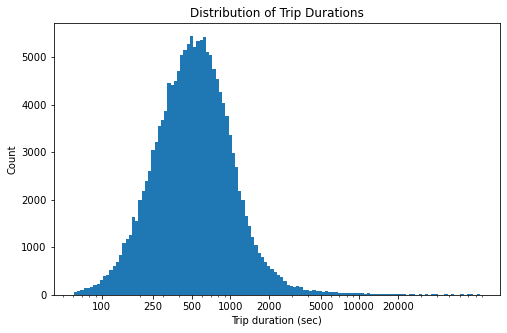

In [4]:
#create bins for the logged values
log_binsize = 0.025
bins = 10 ** np.arange(np.log10(bike_data['duration_sec'].min()),
                       np.log10(bike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'duration_sec', bins = bins)
plt.xscale('log')

plt.xticks([100,250, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [100,250, 500, 1000, 2000, 5000, 10000, 20000])
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip duration (sec)')
plt.ylabel('Count')
plt.show();

## Relationship between trip duration and member gender: 
Members with the gender 'other' are the ones with the longest trip duration with an average duration of approximately 1000 seconds.
But since in the univariate section it was shown that 'other' members are a minority, I'll redo this graph keeping only Male and Female.

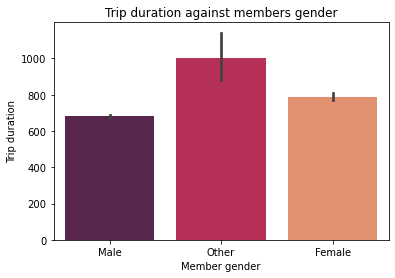

In [5]:
sb.barplot(x=bike_data['member_gender'], y=bike_data['duration_sec'] , palette="rocket")
plt.xlabel('Member gender')
plt.ylabel('Trip duration')
plt.title('Trip duration against members gender');

Trip duration is longer for Female members than Males, the difference is not very significant though (around 100 seconds)

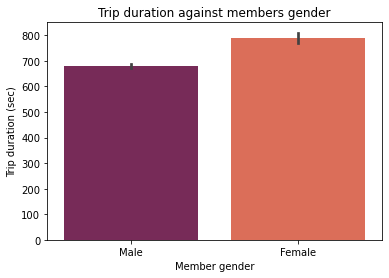

In [6]:
#create new subset with only Male and Female of member_gender values 
genders=bike_data[bike_data['member_gender'].isin(['Male','Female'])]

sb.barplot(x=genders['member_gender'], y=genders['duration_sec'] , palette="rocket")
plt.xlabel('Member gender')
plt.ylabel('Trip duration (sec)')
plt.title('Trip duration against members gender');

## Relationship between trip duration and user type:
Surprisingly, customer (casual users not enrolled in the system) have longer trip durations than subscribers, with averages of 1456 seconds and 645 seconds respectively.

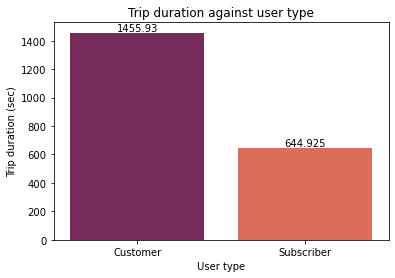

In [7]:
ax=sb.barplot(x=bike_data['user_type'], y=bike_data['duration_sec'] , palette="rocket", ci=None)
plt.xlabel('User type')
plt.ylabel('Trip duration (sec)')
plt.title('Trip duration against user type');

#add count on top of the bar and remove it from the axis
ax.bar_label(ax.containers[0]);

## Relationship between trip duration, gender, and birth year:
Younger females seem to have longer trip durations. <br>
As for Males, they have slightly higher trip durations than the average for those born between 1988 and 1992, as well as those born on 2000. <br>
The "Other" gender type, the highest trip durations are for members born on 1989, 1999, followed by the years 1194, 1998, and 1993.

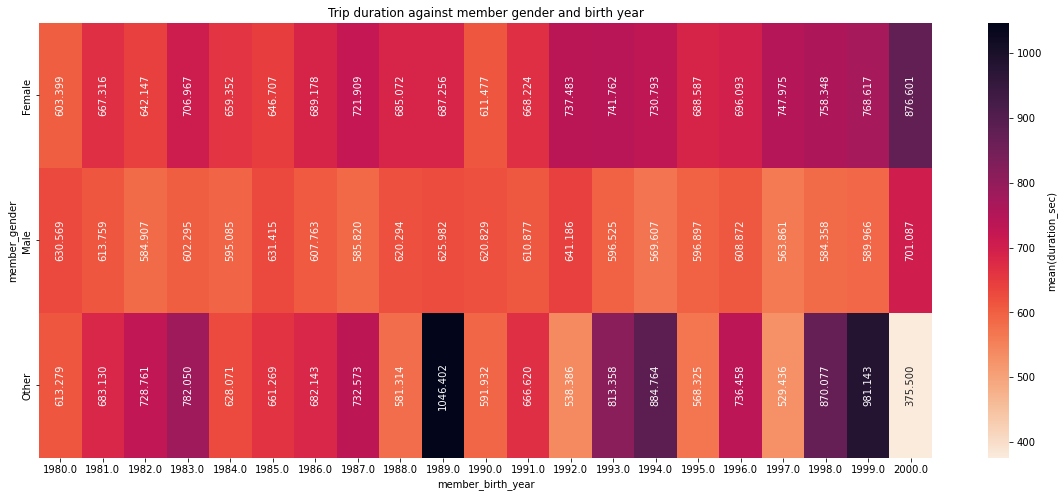

In [8]:
#Creating a sample containg birth year between 1980 and 2000 and trip durations from 0 to 5000 seconds
sample=bike_data[(bike_data["member_birth_year"].isin(np.arange(1980,2001,1))) &
                 (bike_data["duration_sec"].isin(np.arange(0,5001,1)))]

#Creating the mean values that will show inside the heatmap
duration_means = sample.groupby(['member_gender', 'member_birth_year']).mean()['duration_sec']
duration_means = duration_means.reset_index(name = 'duration_avg')
duration_means = duration_means.pivot(index = 'member_gender', columns = 'member_birth_year',
                            values = 'duration_avg')

#Plotting
ax = plt.subplots(figsize=(20, 8))
ax=sb.heatmap(duration_means,  fmt = '.3f', cmap = sb.cm.rocket_r, annot=True,
           cbar_kws = {'label' : 'mean(duration_sec)'}, annot_kws={'rotation': 90})

plt.title('Trip duration against member gender and birth year');

## Relationship between trip duration, bike-share program enrollment and starting stations:
For those enrolled in the bike share program, the highest trip duration corresponds to the starting station of "San Francisco Ferry Building" with a remarkably high average of 2958 seconds, followed by "Steuart St at Market St" and "The Embarcadero at Sansome St".<br>
This might give a great insight on where most of those enrolled in the bike share program are located and use the system for longer trip durations.

I will create a subset of the dataframe with the top 10 starting stations to use it for the analysis of those stations later.

In [9]:
top10=bike_data[bike_data['start_station_name'].isin(['Market St at 10th St', 
                                                      'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
                                                      'Berry St at 4th St',
                                                      'Montgomery St BART Station (Market St at 2nd St)', 
                                                      'Powell St BART Station (Market St at 4th St)', 
                                                      'San Francisco Ferry Building (Harry Bridges Plaza)', 
                                                      'San Francisco Caltrain (Townsend St at 4th St)', 
                                                      'Powell St BART Station (Market St at 5th St) ', 
                                                      'Howard St at Beale St' ,
                                                      'Steuart St at Market St',
                                                     'The Embarcadero at Sansome St'])]

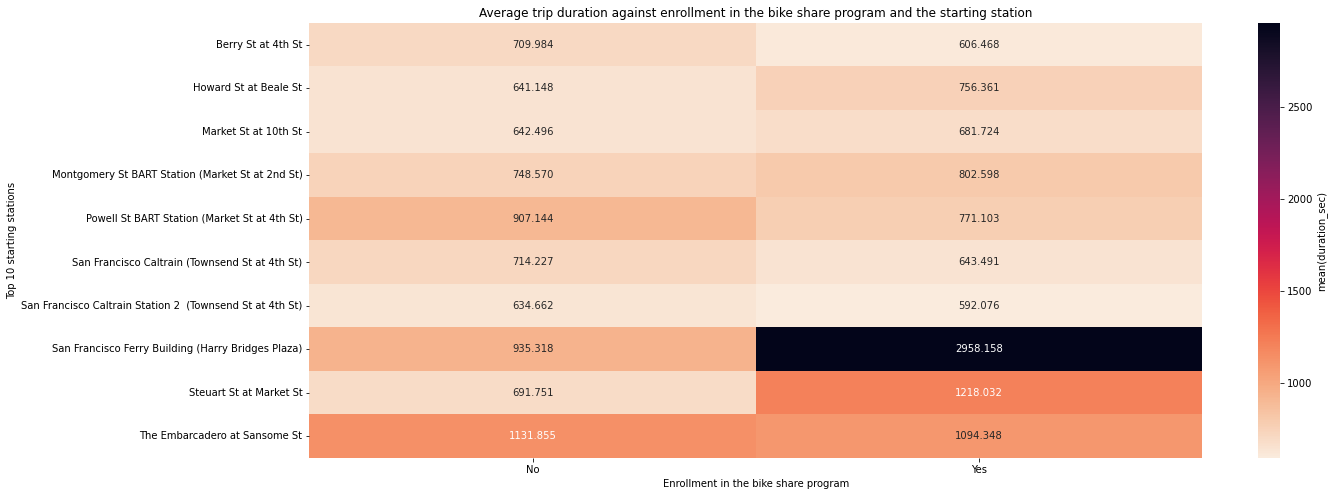

In [10]:
#Creating the mean values that will show inside the heatmap
duration_means = top10.groupby(['start_station_name', 'bike_share_for_all_trip']).mean()['duration_sec']
duration_means = duration_means.reset_index(name = 'duration_avg')
duration_means = duration_means.pivot(index = 'start_station_name', columns = 'bike_share_for_all_trip',
                            values = 'duration_avg')
ax = plt.subplots(figsize=(20, 8))
ax=sb.heatmap(duration_means,  fmt = '.3f', cmap = sb.cm.rocket_r, annot=True,
           cbar_kws = {'label' : 'mean(duration_sec)'})

plt.title('Average trip duration against enrollment in the bike share program and the starting station')
plt.xlabel('Enrollment in the bike share program')
plt.ylabel('Top 10 starting stations');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template-Copy1.ipynb --to slides --post serve  --no-input --no-prompt